**ABALONE**

**Data Set Information:**

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

Our target variable is the rings to determine age

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D # to plot in 3D

import lazypredict
#from lazypredict.Supervised import lazyRegressor
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
pip install sklearn

In [3]:
pip install lazypredict

In [4]:
data=pd.read_csv('Abalone.data', header=None)

In [5]:
data.info

<bound method DataFrame.info of       0      1      2      3       4       5       6       7   8
0     M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 9 columns]>

In [6]:
data.head()

0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

In [7]:
data.columns=['sex','length','diameter','height','whole_weight', 'shucked_weight',
              'viscera_weight','shell_weight','rings']
data.head()

sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**EXPLORATORY DATA ANALYSIS**

In [9]:
#For this we used pandas profiling library
profile= ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

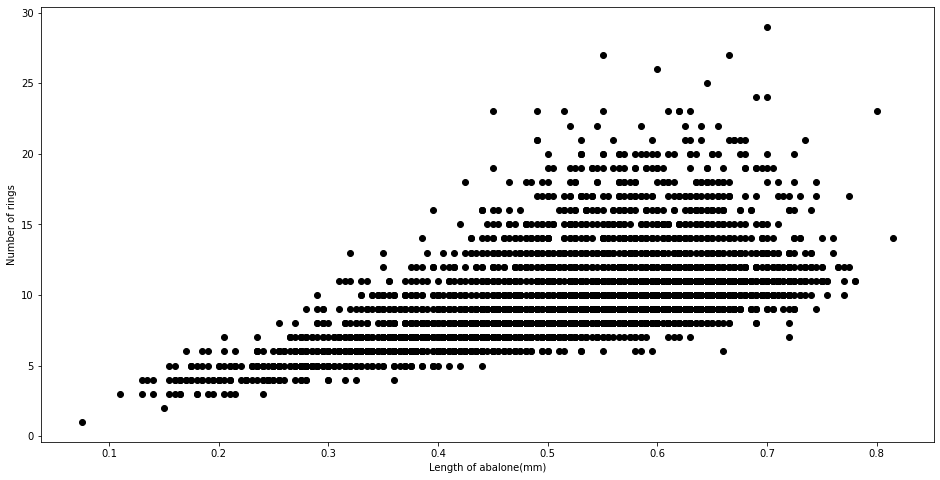

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(data['length'],data['rings'],c='black')
plt.xlabel('Length of abalone(mm)')
plt.ylabel('Number of rings')
plt.show()

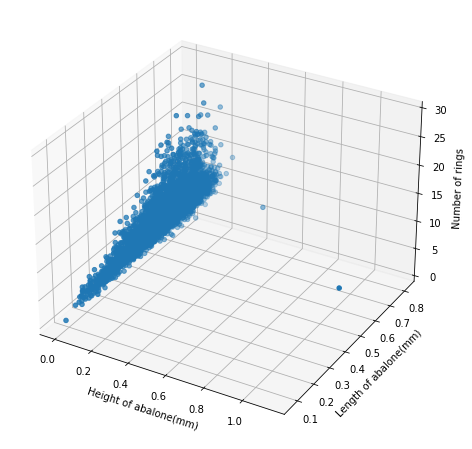

In [11]:
#making a 3D plot of length and height against rings
fig=plt.figure(figsize=(16,8))
ax=plt.axes(projection='3d')
ax.set_xlabel('Height of abalone(mm)')
ax.set_ylabel('Length of abalone(mm)')
ax.set_zlabel('Number of rings')
ax.scatter3D(data['height'], data['length'], data['rings'])
plt.show()

**Feature Engineering (One-hot Encoding)**

In [12]:
encoded_data=pd.get_dummies(data)
encoded_data.head()

length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  sex_F  sex_I  sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

**Modelling a Baseline Model**


In [13]:
#first thing - split data for training and testing
training_set = encoded_data.iloc[:4099,:]
validation_set= encoded_data.iloc[4099:,:]

print(training_set.shape)
print(validation_set.shape)

(4099, 11)
(78, 11)


In [14]:
# Creating the baseline model using multiple regression
x=training_set[['length','height']]
y=training_set[['rings']].values.reshape(-1,1)

# The validation set is to see how the model will perform against unseen data
x_val=validation_set[['length', 'height']]
y_val=validation_set[['rings']].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)

In [15]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

#Test RMSE
lin_reg_pred=lin_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,lin_reg_pred)
print(f'Test RMSE: {np.sqrt(test_rmse)}')

#Validation RMSE
lin_reg_pred_val=lin_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,lin_reg_pred_val)
print(f'validation RMSE: {np.sqrt(val_rmse)}')

Test RMSE: 2.5679099174951547
validation RMSE: 1.5661783782311618


**USING LINEAR REGRESSION REGULARIZATION**

**1.RIDGE REGRESSION**

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [17]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-14,1e-10,1e-9,1e-5,1e-2,1e-1,1,1.5,2,3,4,5,6]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

print(ridge_regressor.best_params_)
print(np.sqrt(-ridge_regressor.best_score_))


{'alpha': 1.5}
2.65933789546344


In [18]:
#Using the best params to carry out prediction
ridge_reg=Ridge(alpha=1.5)
ridge_reg.fit(x_train,y_train)

#Test RMSE
ridge_reg_pred=ridge_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,ridge_reg_pred)
print(f'Ridge test RMSE : {np.sqrt(test_rmse)}')

#Validation RMSE
ridge_reg_pred_val=ridge_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,ridge_reg_pred_val)
print(f'Validation test RMSE : {np.sqrt(val_rmse)}')


Ridge test RMSE : 2.5934441387424956
Validation test RMSE : 1.5625890677307221


**2.LASSO REGRESSION**

In [19]:
#Lasso(L1)
from sklearn.linear_model import Lasso
lasso=Lasso(tol=0.05)
parameters={'alpha':[1e-15,1e-14,1e-10,1e-9,1e-5,1e-2,1e-1,1,1.5,2,3,4,5,6]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

print(lasso_regressor.best_params_)
print(np.sqrt(-lasso_regressor.best_score_))

{'alpha': 0.01}
2.6703778055633767


In [20]:
#Using the best params to carry out prediction
lasso_reg=Lasso(alpha=0.01)
lasso_reg.fit(x_train,y_train)

#Test RMSE
lasso_reg_pred=lasso_reg.predict(x_test)
test_rmse=mean_squared_error(y_test,lasso_reg_pred)
print(f'lasso test RMSE : {np.sqrt(test_rmse)}')

#Validation RMSE
lasso_reg_pred_val=lasso_reg.predict(x_val)
val_rmse=mean_squared_error(y_val,lasso_reg_pred_val)
print(f'lasso validation RMSE : {np.sqrt(val_rmse)}')



lasso test RMSE : 2.610473125813745
lasso validation RMSE : 1.5563831232308802


**USING TREE BASED MODELS**

In [21]:
x=training_set.drop(['diameter', 'whole_weight','shucked_weight','viscera_weight','shell_weight','rings'],axis=1)
y=training_set['rings'].values.reshape(-1,1)

x_val=validation_set.drop(['diameter','whole_weight','shucked_weight','viscera_weight','shell_weight','rings'],axis=1)
y_val=validation_set['rings'].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)